# Visualización de ajuste de modelo lineal a un conjunto de datos de precios de casas.

Primeramente vamos a leer los datos y crear un gráfico de dispersión para observarlos

[193.5332079, 5.220164899]
[149.7227353, 3.170808614]
[224.5199889, 4.989208166]
[129.4586186, 3.047057651]
[279.3559577, 5.777307832]
(47, 2)


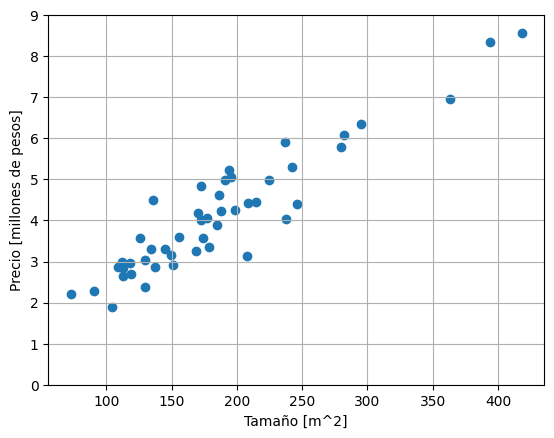

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/noe-tec/machine-learning/main/datasets/ejemplo_data_precio_casas_v2.csv'
response = requests.get(url)

if response.status_code == 200:
    lines = response.text.strip().splitlines()
    data = [list(map(float, line.split(','))) for line in lines]
    for row in data[:5]:  # mostramos 5 primeras lineas
        print(row)
    data = np.array(data)
    print(data.shape)
else:
    print(f'Error al descargar el archivo: {response.status_code}')

x_train = data[:,  0]
y_train = data[:, -1]

plt.scatter(x_train, y_train)
plt.xlabel("Tamaño [m^2]")
plt.ylabel("Precio [millones de pesos]")
plt.ylim((0,9))
plt.grid()


Ahora vamos a crear un gráfico interactivo que nos permita seleccionar valores de los parámetros "w" y "b" y ver la línea resultante. El gráfico también nos muestra un gráfico de contornos de la función costo J(w,b) y el valor actual del costo dados los parámetros.

In [2]:
from ipywidgets import interact, FloatSlider

# --- Funciones auxiliares ---
def prediccion(x, w, b):
    return w * x + b

def calcular_costo(x, y, w, b):
    predicciones = prediccion(x, w, b)
    errores_al_cuadrado = (predicciones - y)**2
    error_cuadratico_medio = errores_al_cuadrado.mean()
    return error_cuadratico_medio

# --- Creamos una rejilla con combinaciones de w y b y calculamos costo para cada combinación ---
rango_w = np.linspace(-0.2, 0.2, 100)
rango_b = np.linspace(-6, 6, 100)
w_valores, b_valores = np.meshgrid(rango_w, rango_b)
costo_valores = np.zeros_like(w_valores)

for i in range(w_valores.shape[0]):
    for j in range(w_valores.shape[1]):
        costo_valores[i, j] = calcular_costo(x_train, y_train, w_valores[i, j], b_valores[i, j])

# Creamos una función para visualizar la linea de ajuste y el costo
def graficar_visualizacion(w, b):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot izquierdo: regresión
    axs[0].scatter(x_train, y_train, label='Datos reales')
    x_line = np.linspace(x_train.min(), x_train.max(), 10)
    y_line = prediccion(x_line, w, b)
    axs[0].plot(x_line, y_line, color='red', label=f'y = {w:.3f}x + {b:.3f}')
    axs[0].set_title(f'Regresión lineal\nCosto (MSE): {calcular_costo(x_train, y_train, w, b):,.2f}')
    axs[0].set_xlabel("Tamaño [m²]")
    axs[0].set_ylabel("Precio [mxn]")
    axs[0].set_ylim((-10, 10))
    axs[0].set_xlim(( 0, x_train.max()))
    axs[0].grid(True)
    axs[0].legend()

    # Subplot derecho: contornos de la función de costo
    levels = np.logspace(0, 2.5, 10)  # Usamos niveles logarítmicos para mejor visualización
    CS = axs[1].contour(w_valores, b_valores, costo_valores, levels=levels, cmap='jet')
    axs[1].set_title("Contornos de la función de costo")
    axs[1].set_xlabel("w (pendiente)")
    axs[1].set_ylabel("b (intersección)")
    axs[1].plot(w, b, 'ro', label='Posición actual')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Grafica interactiva
interact(graficar_visualizacion,
         w=FloatSlider(min=-0.1, max=0.1, step=0.001, value=0, description='w (pendiente)'),
         b=FloatSlider(min=-3, max=3, step=0.01, value=0, description='b (intercepto)'))

interactive(children=(FloatSlider(value=0.0, description='w (pendiente)', max=0.1, min=-0.1, step=0.001), Floa…

<function __main__.graficar_visualizacion(w, b)>

Actividad: Modifica los valores de "w" y "b" usando los sliders. Observa como la linea resutante varía y el costo cambia. ¿Que valores de w y b producen un buen ajuste?

In [6]:
interact(graficar_visualizacion,
         w=FloatSlider(min=-0.1, max=0.1, step=0.001, value=0, description='w (pendiente)'),
         b=FloatSlider(min=-4, max=4, step=0.01, value=0, description='b (intercepto)'))

interactive(children=(FloatSlider(value=0.0, description='w (pendiente)', max=0.1, min=-0.1, step=0.001), Floa…

<function __main__.graficar_visualizacion(w, b)>